# Solving the ocean/atmosphere ODE analytically
The cells blow use the steps in https://www.mathsisfun.com/calculus/differential-equations-first-order-linear.html to obtain analytical solutions to an "ocean/atmosphere" system defined by 

$$
F_{ocean->atm} = k_{oa} C_{ocean} \ \ \ (A1)
$$

$$
F_{atm->ocean} = k_{ao} C_{atm} \ \ \ (A2) 
$$

$$
F_{human->atm} = \epsilon(t) \ \ \ (A3)
$$

under the assumption of exponential growth form for $\epsilon(t)$, namely $\epsilon(t)=Ne^{k(t-t_o)}$ ($t_o$ being typically set to the year 1750). 

### Results
Our solutions to the above equations are

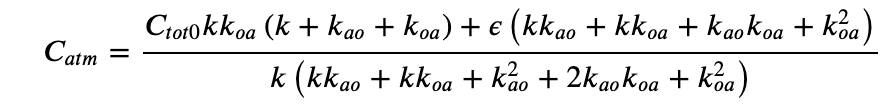 
$$
Eq. (A4)
$$

and 

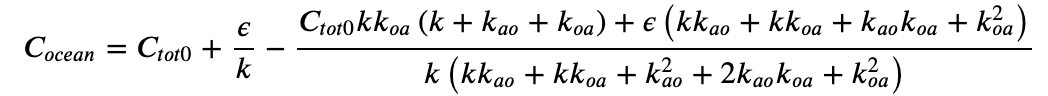
$$
Eq. (A5)
$$

We also find that in the asymptotic (post-transient) limit, these formulas lead to

$$
 {d (log(\Delta C_{atm})) \over dt} = {1 \over \Delta C_{atm}} { {d \Delta C_{atm} \over dt}}= {1 \over \Delta C_{atm}} { {d C_{atm} \over dt}}=k \ \ \ (A6)
$$

and

$$
 {d (log(\Delta C_{ocean})) \over dt} = {1 \over \Delta C_{ocean}} { {d \Delta C_{ocean} \over dt}}= {1 \over \Delta C_{ocean}} { {d C_{ocean} \over dt}}=k \ \ \ (A7)
$$

where

$$
\Delta C_{atm} \equiv C_{atm} - C_{atm}^o \ \ \ (A8)
$$

and

$$
\Delta C_{ocean} \equiv C_{ocean} - C_{ocean}^o \ \ \ (A9)
$$

### Comments
While it is the case that Eqs. A1-A3 are not the full 5-equation Cambio1.0 model, the method below should be extensible to it. That conclusion is motivated by these observations: 
- Cambio1.0 is also 1st order and linear in $C_{atm}$ and $C_{ocean}$, and
- Numerical solutions of Cambio1.0 display the same the asymptotic results as shown in Eqs. A6 and A7 above.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
C_tot0 = sp.Symbol("C_tot0", nonzero=True, positive=True)
C_tot = sp.Symbol("C_tot", nonzero=True, positive=True)
C_atm = sp.Symbol("C_atm", nonzero=True, positive=True)
C_ocean = sp.Symbol("C_ocean")
N = sp.Symbol('N', nonzero=True, positive=True)
k = sp.Symbol('k', nonzero=True, positive=True)
t = sp.Symbol('t', positive=True)
k_oa = sp.Symbol('k_oa', nonzero=True, positive=True)
k_ao = sp.Symbol('k_ao', nonzero=True, positive=True)
u = sp.Symbol('u')
v = sp.Symbol('v')
Catmprime = sp.Symbol("C'_atm")
dudt = sp.Symbol("u'")
dvdt = sp.Symbol("v'")
C1 = sp.Symbol("C1", nonzero=True)
epssym = sp.Symbol('\epsilon')
C_atm_preind = sp.Symbol("C_atm_preind", nonzero=True, positive=True)
C_ocean_preind = sp.Symbol("C_ocean_preind", nonzero=True, positive=True)
r_ao_sym = sp.Symbol("r_ao", nonzero=True, positive=True)

In [4]:
# Emissions (exponential only)
eps = N*sp.exp(k*t); display(eps)

N*exp(k*t)

In [5]:
# Getting an analytical version of the total carbon
dC_atm_dt = eps + k_oa*C_ocean - k_ao*C_atm; display(dC_atm_dt)
dC_ocean_dt =  - k_oa*C_ocean + k_ao*C_atm; display(dC_ocean_dt)
dC_tot_dt = dC_atm_dt + dC_ocean_dt; display(dC_tot_dt)
C_tot = C_tot0 + sp.integrate(dC_tot_dt,t); display(C_tot)

# This is a test
test = sp.diff(sp.log(C_tot-C_tot0),t)
display(test)

# Getting rid of the C_ocean part of the differential of C_atm
dC_atm_dt = dC_atm_dt.subs(C_ocean, C_tot - C_atm); display(dC_atm_dt)
dC_atm_dt = sp.collect(sp.expand(dC_atm_dt,C_atm),C_atm); display(dC_atm_dt)
dC_atm_dt = sp.collect(dC_atm_dt,eps); display(dC_atm_dt)

# Getting "P"
P = -(dC_atm_dt - dC_atm_dt.subs(C_atm,0))/C_atm; print('P='); display(P)

# Getting "Q"
Q = eps + k_oa*C_tot
Q = Q.simplify()
Q = sp.collect(Q,eps)
print('Q='); display(Q)

# Making the first equation
eq1_lhs = Catmprime+P*C_atm
eq1_rhs = Q
eq1 = sp.Eq(eq1_lhs,eq1_rhs); display(eq1)
eq1 = eq1.simplify()
print('eq 1 =')
display(eq1)

# Step 1. Make the uv substitution
eq2 = eq1.subs(Catmprime,v*dudt+u*dvdt)
eq2 = eq2.subs(C_atm,u*v)
print('\nStep 1, eq 2 =')
display(eq2)

# Step 2. Factor parts involving v
eq2_lhs = sp.collect(eq2.lhs,v)
eq2_rhs = eq2.rhs
eq2 = sp.Eq(eq2_lhs,eq2.rhs)
print('\nStep 2, eq 2 =')
display(eq2)

# Step 3. Setting the v-term to zero
vterm = (eq2.lhs-eq2.lhs.subs(v,0))/v
print('vterm =')
display(vterm)
eq3 = sp.Eq(vterm,0)
print('\nStep 3, vterm set to zero:')
display(eq3)

# Step 4. Solve using separation of variables to find u
lhs = (dudt - eq3.rhs)/u
rhs = (dudt - eq3.lhs)/u
eq3 = sp.Eq(lhs,rhs)
print('vterm with variables separated:')
display(eq3)
lhs_integrand = lhs/dudt
lhs_integral = sp.integrate(lhs_integrand,u)
print('Integrated lhs:')
display(lhs_integral)
rhs_integrand = rhs
rhs_integral = sp.integrate(rhs_integrand,t)
print('Integrated rhs:')
display(rhs_integral)
eq4 = sp.Eq(lhs_integral,rhs_integral+C1)
lhs_eq4 = sp.exp(eq4.lhs)
rhs_eq4 = sp.exp(eq4.rhs)
eq4 = sp.Eq(lhs_eq4,rhs_eq4)
print('\nStep 4, eq4:')
display(eq4)
u_solved = rhs_eq4
print('\nStep 4, u:')
display(u_solved)

# Step 5. Substutute u back into what we got in Step 2
lhs_eq5 = (eq2.lhs - v*vterm)/u
rhs_eq5 = eq2.rhs/u
eq5 = sp.Eq(lhs_eq5,rhs_eq5)
print('\nStep 5, eq5:')
display(eq5)
rhs_eq5 = rhs_eq5.subs(u,rhs_eq4)
eq5 = sp.Eq(lhs_eq5,rhs_eq5)
print('\nStep 5, eq5:')
display(eq5)

# Step 6. Solve for v(t)
v_solved = sp.integrate(eq5.rhs,t)
v_solved = v_solved.simplify()
print('\nStep 6, v:')
display(v_solved)

# Step 7. Reconstruct y = uv
C_atm_solved = u_solved*v_solved
C_atm_solved = C_atm_solved.simplify()
print('\nStep 7, C_atm,:')
display(C_atm_solved)
# C_atm_solved = sp.factor(C_atm_solved,sp.exp(k*t))
C_atm_solved = C_atm_solved.subs(N*sp.exp(k*t),epssym)
C_atm_solved = sp.factor(C_atm_solved,epssym)
C_atm_solved = sp.collect(C_atm_solved,C_tot0*k)
print('\nStep 7, C_atm,:')
display(C_atm_solved)
C_atm_solved = sp.simplify(C_atm_solved)
print('\nStep 7, C_atm,:')
display(C_atm_solved)
C_atm_solved_explicit_t = C_atm_solved.subs(epssym,N*sp.exp(k*t))
display(C_atm_solved_explicit_t)
print(C_atm_solved)
eq7 = sp.Eq(C_atm,C_atm_solved)
display(eq7)

-C_atm*k_ao + C_ocean*k_oa + N*exp(k*t)

C_atm*k_ao - C_ocean*k_oa

N*exp(k*t)

C_tot0 + N*exp(k*t)/k

k

-C_atm*k_ao + N*exp(k*t) + k_oa*(-C_atm + C_tot0 + N*exp(k*t)/k)

C_atm*(-k_ao - k_oa) + C_tot0*k_oa + N*exp(k*t) + N*k_oa*exp(k*t)/k

C_atm*(-k_ao - k_oa) + C_tot0*k_oa + N*(1 + k_oa/k)*exp(k*t)

P=


k_ao + k_oa

Q=


C_tot0*k_oa + N*(1 + k_oa/k)*exp(k*t)

Eq(C'_atm + C_atm*(k_ao + k_oa), C_tot0*k_oa + N*(1 + k_oa/k)*exp(k*t))

eq 1 =


Eq(C'_atm + C_atm*(k_ao + k_oa), (C_tot0*k*k_oa + N*(k + k_oa)*exp(k*t))/k)


Step 1, eq 2 =


Eq(u*v*(k_ao + k_oa) + u*v' + u'*v, (C_tot0*k*k_oa + N*(k + k_oa)*exp(k*t))/k)


Step 2, eq 2 =


Eq(u*v' + v*(u*(k_ao + k_oa) + u'), (C_tot0*k*k_oa + N*(k + k_oa)*exp(k*t))/k)

vterm =


u*(k_ao + k_oa) + u'


Step 3, vterm set to zero:


Eq(u*(k_ao + k_oa) + u', 0)

vterm with variables separated:


Eq(u'/u, -k_ao - k_oa)

Integrated lhs:


log(u)

Integrated rhs:


t*(-k_ao - k_oa)


Step 4, eq4:


Eq(u, exp(C1 + t*(-k_ao - k_oa)))


Step 4, u:


exp(C1 + t*(-k_ao - k_oa))


Step 5, eq5:


Eq(v', (C_tot0*k*k_oa + N*(k + k_oa)*exp(k*t))/(k*u))


Step 5, eq5:


Eq(v', (C_tot0*k*k_oa + N*(k + k_oa)*exp(k*t))*exp(-C1 - t*(-k_ao - k_oa))/k)


Step 6, v:


(C_tot0*k**2*k_oa + C_tot0*k*k_ao*k_oa + C_tot0*k*k_oa**2 + N*k*k_ao*exp(k*t) + N*k*k_oa*exp(k*t) + N*k_ao*k_oa*exp(k*t) + N*k_oa**2*exp(k*t))*exp(-C1 + k_ao*t + k_oa*t)/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))


Step 7, C_atm,:


(C_tot0*k**2*k_oa + C_tot0*k*k_ao*k_oa + C_tot0*k*k_oa**2 + N*k*k_ao*exp(k*t) + N*k*k_oa*exp(k*t) + N*k_ao*k_oa*exp(k*t) + N*k_oa**2*exp(k*t))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))


Step 7, C_atm,:


(C_tot0*k*(k*k_oa + k_ao*k_oa + k_oa**2) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))


Step 7, C_atm,:


(C_tot0*k*k_oa*(k + k_ao + k_oa) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))

(C_tot0*k*k_oa*(k + k_ao + k_oa) + N*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2)*exp(k*t))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))

(C_tot0*k*k_oa*(k + k_ao + k_oa) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))


Eq(C_atm, (C_tot0*k*k_oa*(k + k_ao + k_oa) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2)))

In [6]:
# We may as well construct the ocean carbon too
C_tot_explicit_t = C_tot
C_tot = C_tot.subs(N*sp.exp(k*t),epssym)
C_ocean_solved = C_tot - C_atm_solved
C_ocean_solved_explicit_t = C_ocean_solved.subs(epssym,N*sp.exp(k*t))
print('\n C_ocean,:')
display(C_ocean_solved)
display(C_ocean_solved_explicit_t)
print(C_ocean_solved)
eq8 = sp.Eq(C_ocean,C_ocean_solved)
display(eq8)


 C_ocean,:


C_tot0 + \epsilon/k - (C_tot0*k*k_oa*(k + k_ao + k_oa) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))

C_tot0 + N*exp(k*t)/k - (C_tot0*k*k_oa*(k + k_ao + k_oa) + N*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2)*exp(k*t))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))

C_tot0 + \epsilon/k - (C_tot0*k*k_oa*(k + k_ao + k_oa) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2))


Eq(C_ocean, C_tot0 + \epsilon/k - (C_tot0*k*k_oa*(k + k_ao + k_oa) + \epsilon*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2))/(k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2)))

### Testing the large-t limit
Looking at the derivative of the log of the excess carbon. In the limit of large time, we get $k$.

In [7]:
Delta_C_atm_explicit_t = C_atm_solved_explicit_t - C_atm_preind
diff_Delta_C_atm_dt = sp.diff(Delta_C_atm_explicit_t,t)
test_C_atm = diff_Delta_C_atm_dt/Delta_C_atm_explicit_t
test_C_atm = sp.simplify(test_C_atm)
display(test_C_atm)
test_C_atm_limit = sp.limit(test_C_atm,t,sp.oo)
test_C_atm_limit = sp.simplify(test_C_atm_limit)
display(test_C_atm_limit)

Delta_C_ocean_explicit_t = C_ocean_solved_explicit_t - C_ocean_preind
diff_Delta_C_ocean_dt = sp.diff(Delta_C_ocean_explicit_t,t)
test_C_ocean = diff_Delta_C_ocean_dt/Delta_C_ocean_explicit_t
test_C_ocean = sp.simplify(test_C_ocean)
display(test_C_ocean)
test_C_ocean_limit = sp.limit(test_C_ocean,t,sp.oo)
test_C_ocean_limit = sp.simplify(test_C_ocean_limit)
display(test_C_ocean_limit)

N*k*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2)*exp(k*t)/(-C_atm_preind*k*(k*k_ao + k*k_oa + k_ao**2 + 2*k_ao*k_oa + k_oa**2) + C_tot0*k*k_oa*(k + k_ao + k_oa) + N*(k*k_ao + k*k_oa + k_ao*k_oa + k_oa**2)*exp(k*t))

k

N*k*k_ao*(-k_ao - k_oa)*exp(k*t)/(C_ocean_preind*k**2*k_ao + C_ocean_preind*k**2*k_oa + C_ocean_preind*k*k_ao**2 + 2*C_ocean_preind*k*k_ao*k_oa + C_ocean_preind*k*k_oa**2 - C_tot0*k**2*k_ao - C_tot0*k*k_ao**2 - C_tot0*k*k_ao*k_oa - N*k_ao**2*exp(k*t) - N*k_ao*k_oa*exp(k*t))

k

In [8]:
# This is just for fun
r_ao = Delta_C_atm_explicit_t / Delta_C_ocean_explicit_t
r_ao_limit = sp.limit(r_ao,t,sp.oo)
r_ao_limit = sp.simplify(r_ao_limit)
r_ao_eq = sp.Eq(r_ao_sym,r_ao_limit)
display(r_ao_eq)

Eq(r_ao, (k + k_oa)/k_ao)

### Attaching numbers that are more or less realistic for this world (no land)

In [14]:
### Numerical values of the constants and initial conditions
C_atm_preind_num = 615 
k_ao_num = 0.115
k_oa_num = 0.160
k_num = 0.01657
C_ocean_preind_num = C_atm_preind_num * k_ao_num/k_oa_num; print(C_ocean_preind_num)
C_tot0_num = C_atm_preind_num + C_ocean_preind_num; print(C_tot0_num)
year_num = np.linspace(1750,2025,100)
dt = year_num[1]-year_num[0]
t0_num = year_num[0]
t_num = year_num-t0_num
N_num = 9/np.exp(k_num*t_num[-1])

# Functionalizing
C_atm_function = sp.lambdify((C_tot0,k,k_oa,k_ao,N,t), C_atm_solved_explicit_t, 'numpy')
C_ocean_function = sp.lambdify((C_tot0,k,k_oa,k_ao,N,t), C_ocean_solved_explicit_t, 'numpy')
r_ao_function = sp.lambdify((k,k_oa,k_ao), r_ao_eq.rhs, 'numpy')

442.03125000000006
1057.03125


<IPython.core.display.Javascript object>


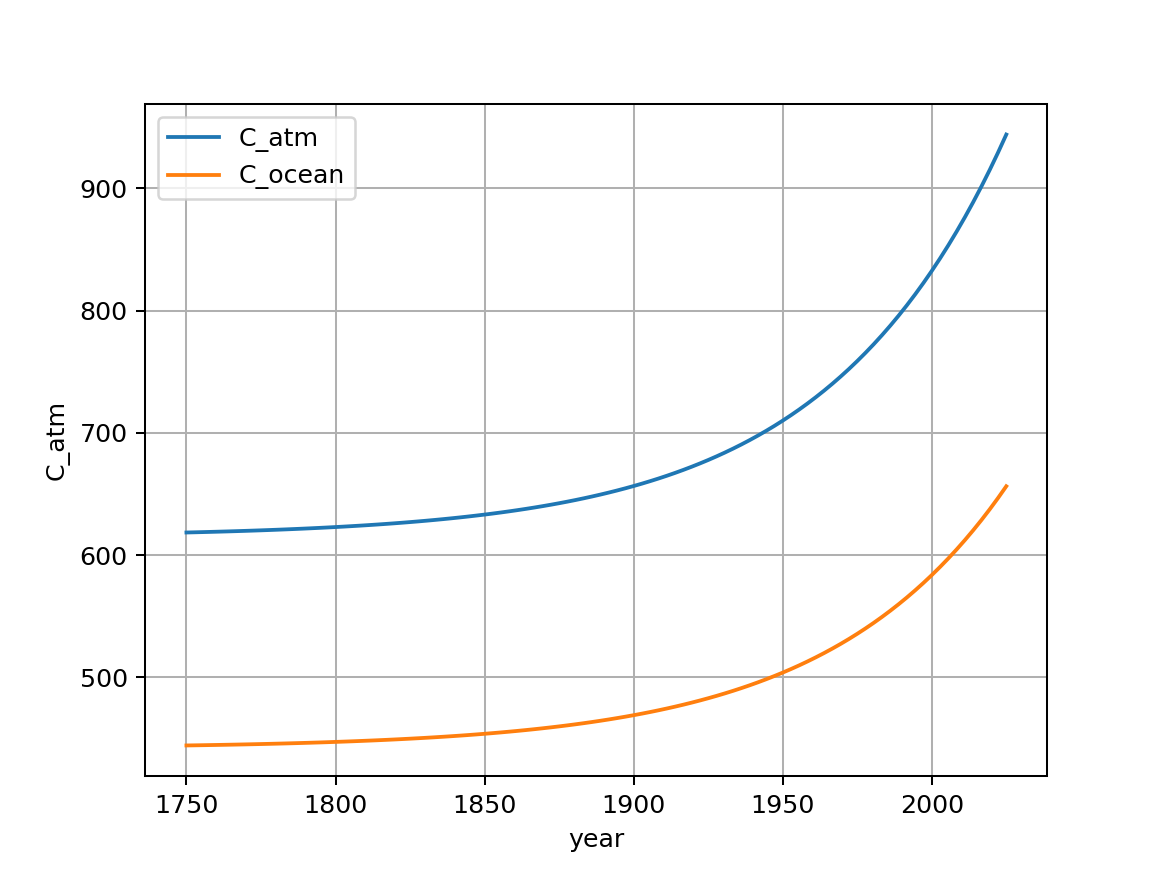

The ratio below should be close to (k + k_oa)/k_ao = 1.535391304347826
1.5353913043478251
Compare to preindustrial value = 1.391304347826087


<IPython.core.display.Javascript object>


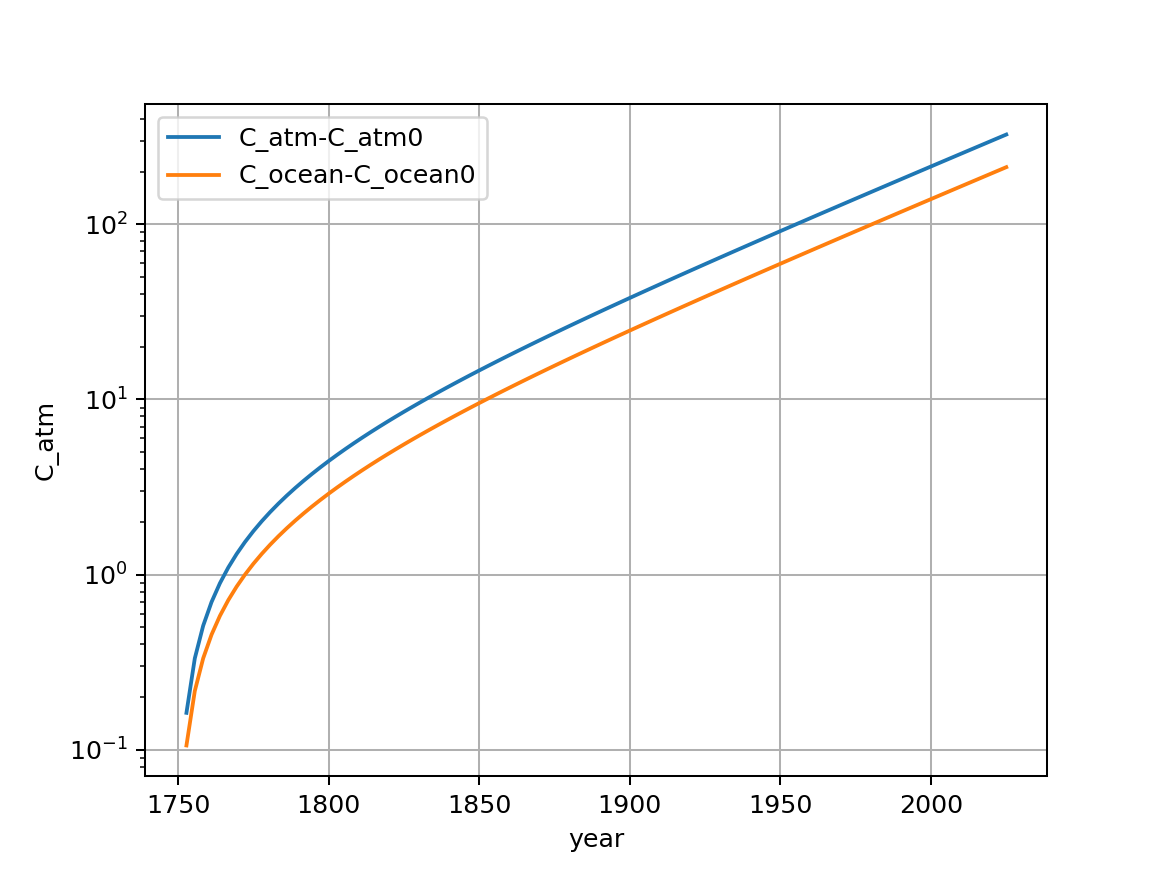

These numbers should be close to k = 0.01657
Delta_C_atm_slope = 0.01674991827782305
Delta_C_ocean_slope = 0.01674991827782305


In [22]:
C_atm_num = C_atm_function(C_tot0_num,k_num,k_oa_num,k_ao_num,N_num,t_num)
C_ocean_num = C_ocean_function(C_tot0_num,k_num,k_oa_num,k_ao_num,N_num,t_num)
Delta_C_atm_num = C_atm_num[1:]-C_atm_num[0]
Delta_C_ocean_num = C_ocean_num[1:]-C_ocean_num[0]

plt.figure()
plt.plot(year_num,C_atm_num,label='C_atm')
plt.plot(year_num,C_ocean_num,label='C_ocean')
plt.xlabel('year')
plt.ylabel('C_atm')
plt.grid(True)
plt.legend()

r_ao_num = (C_atm_num[-1]-C_atm_num[0]) / (C_ocean_num[-1]-C_ocean_num[0])
print('The ratio below should be close to '+str(r_ao_eq.rhs)+' =', r_ao_function(k_num,k_oa_num,k_ao_num))
print(r_ao_num)
print('Compare to preindustrial value =', k_oa_num/k_ao_num)

plt.figure()
plt.semilogy(year_num[1:],Delta_C_atm_num,label='C_atm-C_atm0')
plt.semilogy(year_num[1:],Delta_C_ocean_num,label='C_ocean-C_ocean0')
plt.xlabel('year')
plt.ylabel('C_atm')
plt.grid(True)
plt.legend()
print('These numbers should be close to k =', k_num)
Delta_C_atm_slope = (np.log(Delta_C_atm_num[-1]) - np.log(Delta_C_atm_num[-2]))/dt
print('Delta_C_atm_slope =',Delta_C_atm_slope)
Delta_C_ocean_slope = (np.log(Delta_C_ocean_num[-1]) - np.log(Delta_C_ocean_num[-2]))/dt
print('Delta_C_ocean_slope =',Delta_C_ocean_slope)

'(k + k_oa)/k_ao'